In [1]:
import zarr
import numpy as np

import ngff_transformations.graph
import ngff_transformations.transform as ngt

from pathlib import Path
from ome_zarr_models._v06.image import Image
from ome_zarr_models._v06.collection import Collection
from ngff_transformations.graph import transform_graph_to_networkx, draw_graph

📈 Rendering transform graph for user_stories/human_organ_atlas.zarr


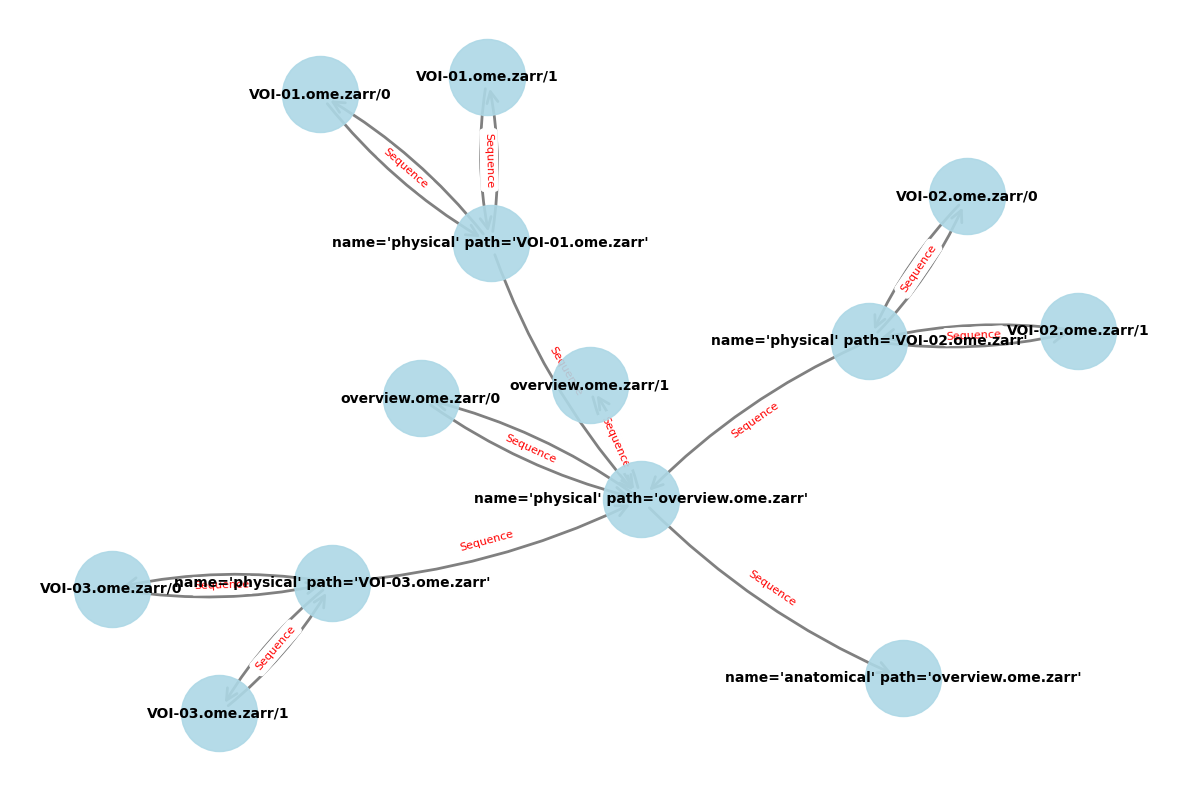

In [2]:
EXAMPLE_PATH = (
    Path("../data/ngff-rfc5-coordinate-transformation-examples")
)


def get_all_zarrs(directory: Path) -> list[Path]:
    """
    Get all Zarr sub-directories.
    """
    zarrs: list[Path] = []
    for f in directory.glob("*"):
        if f.is_dir():
            if f.suffix == ".zarr":
                # Found a Zarr group
                zarrs.append(f)
            else:
                # Recurse
                zarrs += get_all_zarrs(f)

    return sorted(zarrs)


for zarr_path in get_all_zarrs(EXAMPLE_PATH):
    relative_path = zarr_path.relative_to(EXAMPLE_PATH)

    if 'organ' not in str(relative_path):
        continue

    group: Collection | Image
    try:
        if relative_path.parts[0] == "user_stories":
            group = Collection.from_zarr(zarr.open_group(zarr_path, mode="r"))
        else:
            group = Image.from_zarr(zarr.open_group(zarr_path, mode="r"))
    except Exception as e:
        # raise e
        # print(str(e))
        # continue
        print(f"😢 Failed to load group at {zarr_path.relative_to(EXAMPLE_PATH)}")
        continue

    print(f"📈 Rendering transform graph for {zarr_path.relative_to(EXAMPLE_PATH)}")
    graph = group.transform_graph()
    nx_graph = transform_graph_to_networkx(graph)
    draw_graph(nx_graph)

In [3]:
transformation_path, (src_coord_system, tgt_coord_system) = ngff_transformations.graph.find_walks_in_graph(nx_graph, 'VOI-01.ome.zarr/1', None, 'overview.ome.zarr', 'anatomical')

In [4]:
transformation_path

Sequence(type='sequence', input='VOI-01.ome.zarr/1', output=CoordinateSystemIdentifier(name='anatomical', path='overview.ome.zarr'), name=None, transformations=(Sequence(type='sequence', input='1', output='physical', name=None, transformations=(Scale(type='scale', input=None, output=None, name=None, scale=(8.52, 8.52, 8.52), path=None), Translation(type='translation', input=None, output=None, name=None, translation=(4.26, 4.26, 4.26), path=None))), Sequence(type='sequence', input=CoordinateSystemIdentifier(name='physical', path='VOI-01.ome.zarr'), output=CoordinateSystemIdentifier(name='physical', path='overview.ome.zarr'), name='VOI-01 registration', transformations=(Scale(type='scale', input=None, output=None, name=None, scale=(1.0, 1.0, 1.0), path=None), Rotation(type='rotation', input=None, output=None, name=None, rotation=((0.0, 0.0, 1.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)), path=None), Translation(type='translation', input=None, output=None, name=None, translation=(0.0, 0.0, 0.0),

In [5]:
data = np.ones((30, 40, 50, 3), dtype=np.uint8)

In [6]:
transformed_data = ngt.transform_with_sequence3D(data, ['y', 'x', 'z', 'c'], transformation_path, ['y', 'x', 'z', 'c'])

In [7]:
transformed_data

<xarray.DataArray (y: 30, x: 40, z: 50, c: 3)> Size: 180kB
array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
...
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]]], shape=(30, 40, 50, 3), dtype=uint8)
Coordinates:
    x_prime  (y, x, z) float64 480kB 4.26 12.78 21.3 29.82 ... 404.7 413.2 421.7
    y_prime  (y, x, z) float64 480kB 4.26 4.26 4.26 4.26 ... 251.3 251.3 251.3
    z_prime  (y, x, z) float64 480kB 4.26 12.78 21.3 29.82 ... 404.7 413.2 421.7
Dimensions without coordinates: y, x, z, c